In [2]:
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import random

In [3]:
# 读取train_label_coordinates.csv文件进行调查
train_label_coordinates_df = pd.read_csv('./dataset/train_label_coordinates.csv')

# 显示
train_label_coordinates_df.head()

# 48692 rows × 7 columns

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


image_data shape: (320, 320)


study_id                            943718301
series_id                          4247676652
instance_number                            34
condition          Left Subarticular Stenosis
level                                   L1/L2
x                                  175.996409
y                                   190.59246
Name: 10529, dtype: object

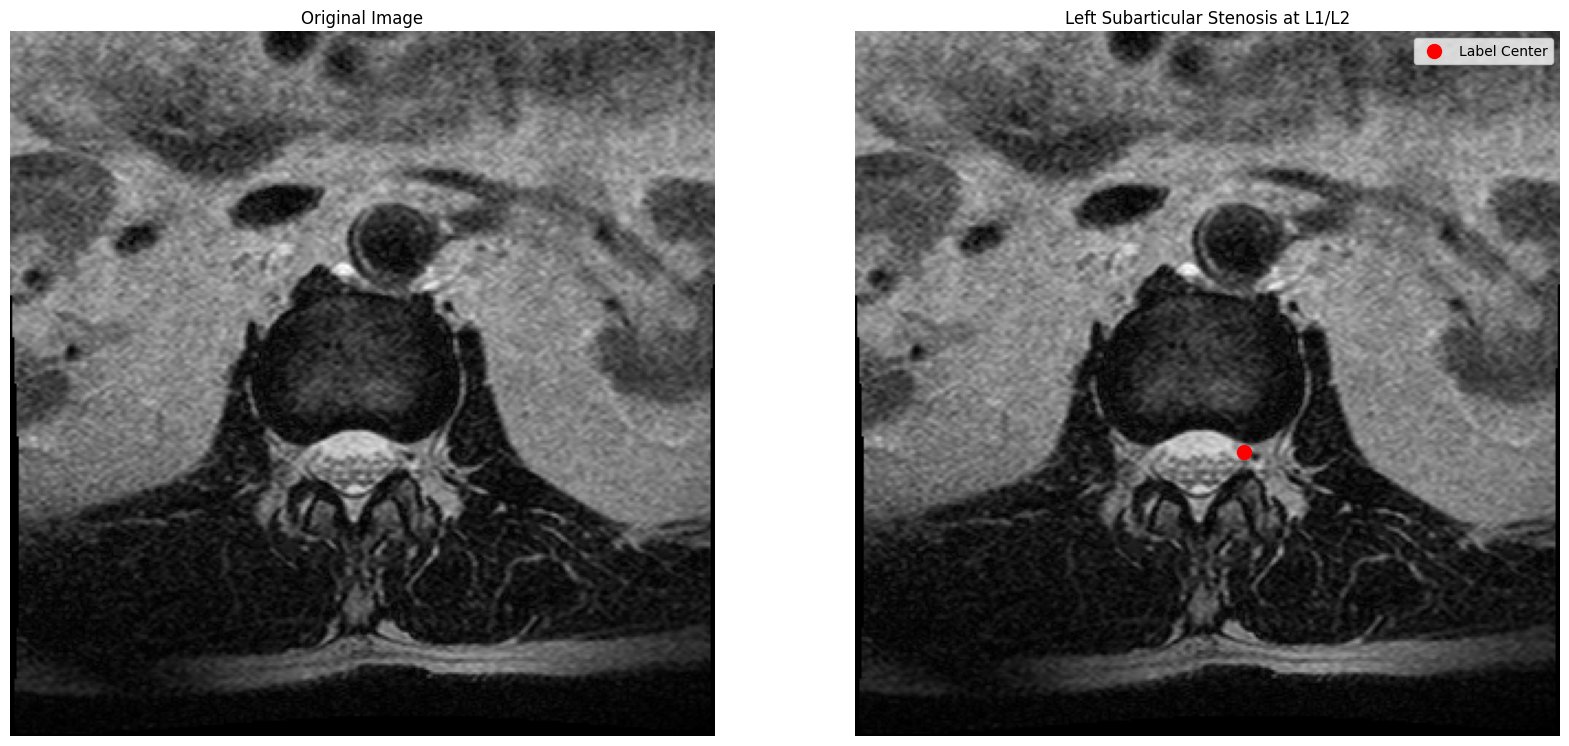

In [14]:
# 读取 train_label_coordinates.csv 文件
train_label_coordinates_df = pd.read_csv('./dataset/train_label_coordinates.csv')

# 随机选择一行
random_row = train_label_coordinates_df.sample(n=1).iloc[0]

# 获取随机行的信息
study_id = random_row['study_id']
series_id = random_row['series_id']
instance_number = random_row['instance_number']
condition = random_row['condition']
level = random_row['level']
x, y = random_row['x'], random_row['y']

# DICOM 文件路径
dicom_file_path = f'./dataset/train_images/{study_id}/{series_id}/{instance_number}.dcm'

# 读取 DICOM 文件
dicom_image = pydicom.dcmread(dicom_file_path)
image_data = dicom_image.pixel_array
print(f'image_data shape: {image_data.shape}')

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(image_data, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_data, cmap='gray')
axes[1].scatter([x], [y], color='red', s=100, label='Label Center')  # 添加标签点
axes[1].set_title(f'{condition} at {level}')
axes[1].set_xlabel('X Coordinate')
axes[1].set_ylabel('Y Coordinate')
axes[1].legend()
axes[1].axis('off')

random_row